In [1]:
import numpy as np # linear algebra
import pandas as pd 
import math
import seaborn as sns
import datetime as dt
from datetime import datetime    
sns.set_style("whitegrid")
from pandas.plotting import autocorrelation_plot
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("ggplot")

In [38]:
data = pd.read_csv('../../datasets/meta.csv')
data.head()

,Date,Open,High,Low,Close,Volume
0,2012-05-18,42.05,45.00,38.00,38.2318,573576400
1,2012-05-21,36.53,36.66,33.00,34.0300,168192700
2,2012-05-22,32.61,33.59,30.94,31.0000,101786600
3,2012-05-23,31.37,32.50,31.36,32.0000,73600000
4,2012-05-24,32.95,33.21,31.77,33.0300,50237200


In [39]:
# Reset index
data.reset_index(drop=True, inplace=True)

# Select numeric columns
numeric_data = data.select_dtypes(include=[np.number])

# Fill NaN values in numeric columns with the mean of those columns
data[numeric_data.columns] = data[numeric_data.columns].fillna(numeric_data.mean())

# Display the first few rows of the DataFrame
print(data.head())

         Date   Open   High    Low    Close     Volume
0  2012-05-18  42.05  45.00  38.00  38.2318  573576400
1  2012-05-21  36.53  36.66  33.00  34.0300  168192700
2  2012-05-22  32.61  33.59  30.94  31.0000  101786600
3  2012-05-23  31.37  32.50  31.36  32.0000   73600000
4  2012-05-24  32.95  33.21  31.77  33.0300   50237200


In [40]:
# Calculate moving average
ma_day = [5, 10, 20, 50]  # Common short-term and long-term windows
for ma in ma_day:
    column_name = f"MA for {ma} days"
    data[column_name] = data['Close'].rolling(window=ma).mean()

# Calculate Exponential moving average
for ma in ma_day:
    column_name = f"EMA for {ma} days"
    data[column_name] = data['Close'].ewm(span=ma, adjust=False).mean()

# Volatility (Standard Deviation): Capture price fluctuations:
# for ma in ma_day:
#     column_name = f"Volatility_{ma}d"
#     data[column_name] = data['Close'].rolling(window=ma).std()

# Calculate RSI
def compute_RSI(data, window=14):
    delta = data['Close'].diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    RS = gain / loss
    return 100 - (100 / (1 + RS))

data['RSI_14'] = compute_RSI(data)

# MACD
exp1 = data['Close'].ewm(span=12, adjust=False).mean()
exp2 = data['Close'].ewm(span=26, adjust=False).mean()
data['MACD'] = exp1 - exp2




            Date    Open     High       Low     Close     Volume  \
0     2012-05-18   42.05   45.000   38.0000   38.2318  573576400   
1     2012-05-21   36.53   36.660   33.0000   34.0300  168192700   
2     2012-05-22   32.61   33.590   30.9400   31.0000  101786600   
3     2012-05-23   31.37   32.500   31.3600   32.0000   73600000   
4     2012-05-24   32.95   33.210   31.7700   33.0300   50237200   
...          ...     ...      ...       ...       ...        ...   
2668  2022-12-23  116.03  118.175  115.5350  118.0400   17796625   
2669  2022-12-27  117.93  118.600  116.0501  116.8800   21392311   
2670  2022-12-28  116.25  118.150  115.5100  115.6200   19612473   
2671  2022-12-29  116.40  121.030  115.7700  120.2600   22366192   
2672  2022-12-30  118.16  120.420  117.7400  120.3400   19583825   

      MA for 5 days  MA for 10 days  MA for 20 days  MA for 50 days  \
0               NaN             NaN             NaN             NaN   
1               NaN             NaN      

,count,mean,std,min,25%,50%,75%,max
Open,2673.0,1.479633e+02,8.696828e+01,1.808000e+01,7.780000e+01,1.422600e+02,1.913600e+02,3.816800e+02
High,2673.0,1.498468e+02,8.805465e+01,1.827000e+01,7.853000e+01,1.445600e+02,1.940300e+02,3.843300e+02
Low,2673.0,1.460862e+02,8.591529e+01,1.755000e+01,7.705000e+01,1.408700e+02,1.884700e+02,3.788100e+02
Close,2673.0,1.479917e+02,8.699929e+01,1.772900e+01,7.783000e+01,1.422800e+02,1.912900e+02,3.821800e+02
Volume,2673.0,3.115405e+07,2.721709e+07,5.913066e+06,1.618928e+07,2.313342e+07,3.599420e+07,5.735764e+08
MA for 5 days,2669.0,1.480981e+02,8.692966e+01,1.846140e+01,7.780600e+01,1.422620e+02,1.913780e+02,3.790300e+02
MA for 10 days,2664.0,1.482359e+02,8.686269e+01,1.877955e+01,7.777912e+01,1.418685e+02,1.917312e+02,3.786580e+02
MA for 20 days,2654.0,1.485193e+02,8.673551e+01,1.925918e+01,7.751544e+01,1.434165e+02,1.920813e+02,3.734220e+02
MA for 50 days,2624.0,1.493997e+02,8.630554e+01,2.017572e+01,7.745560e+01,1.471485e+02,1.906790e+02,3.637544e+02
EMA for 5 days,2673.0,1.479314e+02,8.694024e+01,1.846579e+01,7.757111e+01,1.420655e+02,1.913073e+02,3.782458e+02


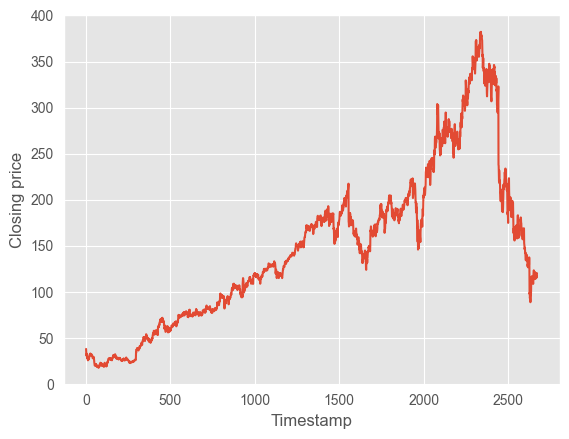

In [41]:
plt.plot(data['Close'], label="Close price")
plt.xlabel("Timestamp")
plt.ylabel("Closing price")
df = data
print(df)

df.describe().transpose()

In [42]:
data.dropna(inplace=True)
data.head(500)

,Date,Open,High,Low,Close,Volume,MA for 5 days,MA for 10 days,MA for 20 days,MA for 50 days,EMA for 5 days,EMA for 10 days,EMA for 20 days,EMA for 50 days,RSI_14,MACD
49,2012-07-30,23.995,24.04,23.030,23.15,29285900,26.29800,27.52000,29.237800,29.838636,25.546291,27.046144,28.449746,30.538853,15.733114,-1.525536
50,2012-07-31,23.370,23.37,21.610,21.71,56179400,24.95000,26.88200,28.784750,29.508200,24.267527,26.075936,27.807865,30.192623,14.602446,-1.869091
51,2012-08-01,21.500,21.58,20.840,20.88,44604400,23.25800,26.05900,28.268750,29.245200,23.138351,25.131220,27.148068,29.827422,13.890909,-2.183168
52,2012-08-02,20.770,20.84,19.820,20.04,56374500,21.89700,25.16300,27.697250,29.026000,22.105568,24.205544,26.471110,29.443602,13.172414,-2.471369
53,2012-08-03,20.360,22.16,19.900,21.09,80647000,21.37400,24.39600,27.165250,28.807800,21.767045,23.639081,25.958623,29.116010,22.638623,-2.585243
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
544,2014-07-21,68.810,69.96,68.500,69.40,49431600,67.81096,66.58973,66.626865,64.001716,68.007206,67.283914,66.478537,64.769416,56.251778,1.037495
545,2014-07-22,69.760,69.77,68.610,69.27,40301800,68.23196,67.24073,66.821865,64.242316,68.428138,67.645020,66.744391,64.945909,53.726471,1.134074
546,2014-07-23,69.740,71.33,69.610,71.29,77435900,68.95796,67.87273,67.100365,64.471516,69.382092,68.307744,67.177306,65.194697,64.538726,1.357958
547,2014-07-24,75.960,76.74,74.510,74.98,124006900,70.67198,68.88348,67.477365,64.774516,71.248061,69.520881,67.920420,65.578435,71.536342,1.812249


In [43]:
# updated Code

feature_columns = [
    'Close',          # Most important feature (direct price information)
    'Low',            # Important price-related feature
    'High',           # Important price-related feature
    'Open',           # Important price-related feature
    'EMA for 5 days', # Short-term trend indicator
    'MA for 5 days',  # Short-term trend indicator
    'RSI_14'          # Momentum indicator
]

from sklearn.model_selection import train_test_split
import numpy as np

X = []
Y = []
window_size = 15

# Iterating through the dataset to create inputs and targets
for i in range(1, len(df) - window_size - 1, 1):
    first_close = df.iloc[i, df.columns.get_loc('Close')]  # Normalize using "Close" price
    temp = []
    temp2 = []
    
    for j in range(window_size):
        # Normalize each feature in the feature_columns list
        normalized_features = []
        for feature in feature_columns:
            if feature == 'Close':
                # Normalize "Close" relative to the first_close
                normalized_value = (df.iloc[i + j, df.columns.get_loc(feature)] - first_close) / first_close
            else:
                # For other features, normalize them directly (or use their raw values if normalization isn't required)
                normalized_value = df.iloc[i + j, df.columns.get_loc(feature)]
            normalized_features.append(normalized_value)
        
        # Append the normalized features for this time step
        temp.append(normalized_features)
    
    # Calculate the target (normalized change in "Close" price)
    target = (df.iloc[i + window_size, df.columns.get_loc('Close')] - first_close) / first_close
    temp2.append(target)
    
    # Append the input and target to X and Y
    X.append(np.array(temp))  # Each sample has shape (window_size, len(feature_columns))
    Y.append(np.array(temp2).reshape(1, 1))

# Splitting the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, shuffle=False)

# Converting lists to numpy arrays
train_X = np.array(x_train)
test_X = np.array(x_test)
train_Y = np.array(y_train)
test_Y = np.array(y_test)

# Verify the shape of train_X
print("Shape of train_X before reshaping:", train_X.shape)

# Reshaping the data for CNN models
# Assuming train_X has shape (num_samples, window_size, num_features)
train_X = train_X.reshape(train_X.shape[0], 1, train_X.shape[1], train_X.shape[2])  
test_X = test_X.reshape(test_X.shape[0], 1, test_X.shape[1], test_X.shape[2])

# Printing the number of training and testing samples
print("Shape of train_X after reshaping:", train_X.shape)
print("Shape of test_X after reshaping:", test_X.shape)
print("Number of training samples:", len(train_X))
print("Number of testing samples:", len(test_X))

Shape of train_X before reshaping: (2085, 15, 7)
Shape of train_X after reshaping: (2085, 1, 15, 7)
Shape of test_X after reshaping: (522, 1, 15, 7)
Number of training samples: 2085
Number of testing samples: 522


In [44]:
# Check if there are any NaN values

print(np.isnan(train_X).any(), np.isnan(train_Y).any())
print(np.isinf(train_X).any(), np.isinf(train_Y).any())

False False
False False


In [45]:
import tensorflow as tf
from tensorflow.keras.layers import Conv1D, LSTM, Dense, Dropout, Bidirectional, TimeDistributed
from tensorflow.keras.layers import MaxPooling1D, Flatten, BatchNormalization, LeakyReLU
from tensorflow.keras.regularizers import L1L2
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam


# Create the model
model = tf.keras.Sequential()

# Enhanced CNN layers with BatchNormalization and LeakyReLU
model.add(TimeDistributed(Conv1D(64, kernel_size=3, padding='same', 
                               kernel_regularizer=L1L2(l1=1e-5, l2=1e-4),
                               input_shape=(None, 100, 1))))
model.add(TimeDistributed(BatchNormalization()))
model.add(TimeDistributed(LeakyReLU(alpha=0.1)))
model.add(TimeDistributed(MaxPooling1D(2)))

model.add(TimeDistributed(Conv1D(128, kernel_size=3, padding='same',
                               kernel_regularizer=L1L2(l1=1e-5, l2=1e-4))))
model.add(TimeDistributed(BatchNormalization()))
model.add(TimeDistributed(LeakyReLU(alpha=0.1)))
model.add(TimeDistributed(MaxPooling1D(2)))

model.add(TimeDistributed(Conv1D(64, kernel_size=3, padding='same',
                               kernel_regularizer=L1L2(l1=1e-5, l2=1e-4))))
model.add(TimeDistributed(BatchNormalization()))
model.add(TimeDistributed(LeakyReLU(alpha=0.1)))
model.add(TimeDistributed(MaxPooling1D(2)))

model.add(TimeDistributed(Flatten()))

# Enhanced LSTM layers (removed clip_norm parameter)
model.add(Bidirectional(LSTM(128, return_sequences=True, 
                            kernel_regularizer=L1L2(l1=1e-5, l2=1e-4),
                            recurrent_regularizer=L1L2(l1=1e-5, l2=1e-4))))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Bidirectional(LSTM(64, return_sequences=True,  # Set return_sequences=True for Attention
                            kernel_regularizer=L1L2(l1=1e-5, l2=1e-4),
                            recurrent_regularizer=L1L2(l1=1e-5, l2=1e-4))))
model.add(BatchNormalization())
model.add(Dropout(0.5))


# Dense layers with regularization
model.add(Dense(32, kernel_regularizer=L1L2(l1=1e-5, l2=1e-4)))
model.add(BatchNormalization())
model.add(LeakyReLU(alpha=0.1))
model.add(Dropout(0.2))

model.add(Dense(1, activation='linear'))

# Optimizer with gradient clipping (clipnorm moved here)
optimizer = Adam(learning_rate=0.001, clipnorm=1.0)

model.compile(optimizer=optimizer,
             loss='mse',
             metrics=['mse', 'mae'])

# Define callbacks
callbacks = [
    EarlyStopping(
        monitor='val_loss',
        patience=10,
        restore_best_weights=True
    ),
    ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.2,
        patience=5,
        min_lr=1e-6
    )
]

# Train the model
history = model.fit(
    train_X, 
    train_Y,
    validation_data=(test_X, test_Y),
    epochs=100,
    batch_size=32,
    callbacks=callbacks,
    verbose=1,
    shuffle=True
)

Epoch 1/100


c:\Users\timoz\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\timoz\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\activations\leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


66/66 ━━━━━━━━━━━━━━━━━━━━ 19s 43ms/step - loss: 1.0222 - mae: 0.6842 - mse: 0.7323 - val_loss: 0.2284 - val_mae: 0.1275 - val_mse: 0.0210 - learning_rate: 0.0010
Epoch 2/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.4427 - mae: 0.3875 - mse: 0.2427 - val_loss: 0.2032 - val_mae: 0.0934 - val_mse: 0.0130 - learning_rate: 0.0010
Epoch 3/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.3411 - mae: 0.3022 - mse: 0.1519 - val_loss: 0.1973 - val_mae: 0.0756 - val_mse: 0.0102 - learning_rate: 0.0010
Epoch 4/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.2742 - mae: 0.2333 - mse: 0.0878 - val_loss: 0.1940 - val_mae: 0.0726 - val_mse: 0.0096 - learning_rate: 0.0010
Epoch 5/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.2502 - mae: 0.2015 - mse: 0.0665 - val_loss: 0.1923 - val_mae: 0.0735 - val_mse: 0.0108 - learning_rate: 0.0010
Epoch 6/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.2254 - mae: 0.1661 - mse: 0.0447 - val_loss: 0.1884 - val_mae: 0.0716 - val_mse

Training Loss: [0.8108780980110168, 0.4076344668865204, 0.3205713927745819, 0.26615869998931885, 0.24362580478191376, 0.2215222418308258, 0.20916494727134705, 0.202850341796875, 0.1914048045873642, 0.1860249936580658, 0.17752200365066528, 0.17063036561012268, 0.16533124446868896, 0.15941788256168365, 0.15246397256851196, 0.14679890871047974, 0.14098764955997467, 0.13556361198425293, 0.13059334456920624, 0.1246705874800682, 0.11976148933172226, 0.11459928750991821, 0.1090298444032669, 0.10387351363897324, 0.09908262640237808, 0.09435965865850449, 0.08970659971237183, 0.08496856689453125, 0.08061430603265762, 0.07621680200099945, 0.07288192212581635, 0.06885984539985657, 0.06463809311389923, 0.06104881316423416, 0.05699322372674942, 0.05384017154574394, 0.050458017736673355, 0.048031874001026154, 0.04466007649898529, 0.04209243506193161, 0.03937876597046852, 0.03718573972582817, 0.034645650535821915, 0.03258979693055153, 0.03079664520919323, 0.028853707015514374, 0.026875674724578857, 0.

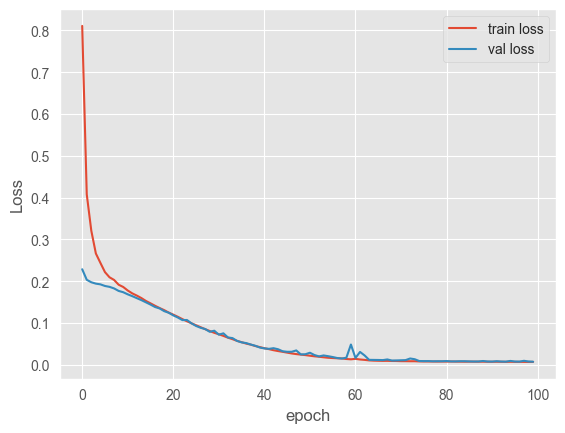

In [46]:
# loss
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.xlabel("epoch")
plt.ylabel("Loss")
plt.legend()

print("Training Loss:", history.history.get('loss', []))
print("Validation Loss:", history.history.get('val_loss', []))




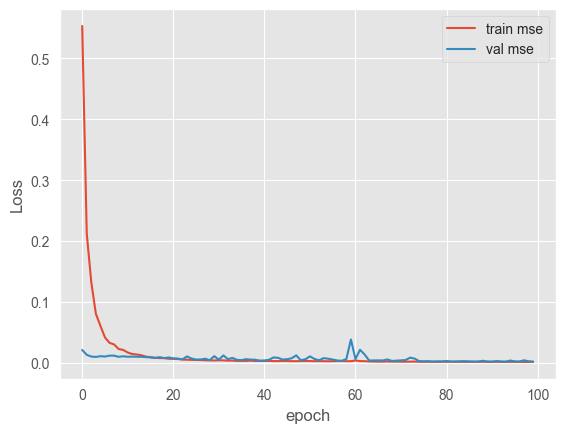

In [47]:
# mse
plt.plot(history.history['mse'], label='train mse')
plt.plot(history.history['val_mse'], label='val mse')
plt.xlabel("epoch")
plt.ylabel("Loss")
plt.legend()



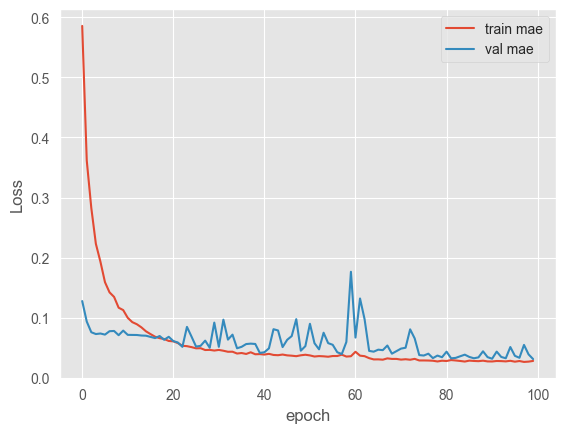

In [48]:
# mae
plt.plot(history.history['mae'], label='train mae')
plt.plot(history.history['val_mae'], label='val mae')
plt.xlabel("epoch")
plt.ylabel("Loss")
plt.legend()

In [49]:
model.evaluate(test_X, test_Y)

17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0062 - mae: 0.0232 - mse: 0.0010    


[0.007056684233248234, 0.0018980603199452162, 0.030891558155417442]

In [50]:
from sklearn.metrics import explained_variance_score
from sklearn.metrics import r2_score
from sklearn.metrics import max_error

# predict probabilities for test set
yhat_probs = model.predict(test_X, verbose=0)
# reduce to 1d array
yhat_probs = yhat_probs[:, 0]

var = explained_variance_score(test_Y.reshape(-1,1), yhat_probs)
print('Variance: %f' % var)

r2 = r2_score(test_Y.reshape(-1,1), yhat_probs)
print('R2 Score: %f' % var)

var2 = max_error(test_Y.reshape(-1,1), yhat_probs)
print('Max Error: %f' % var2)

Variance: 0.807038
R2 Score: 0.807038
Max Error: 0.256769


In [51]:
# make predictions
predicted  = model.predict(test_X)
test_label = test_Y.reshape(-1,1)
predicted = np.array(predicted[:,0]).reshape(-1,1)
len_t = len(train_X)
for j in range(len_t , len_t + len(test_X)):
    temp = data.iloc[j,3]
    test_label[j - len_t] = test_label[j - len_t] * temp + temp
    predicted[j - len_t] = predicted[j - len_t] * temp + temp



17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


In [52]:
def plot_predictions(test_label, predicted, title="Stock Price Prediction"):
    # Create figure and axis with specified size
    plt.figure(figsize=(15, 7))
    
    # Plot actual prices
    plt.plot(test_label, label='Actual Price', color='green')
    
    # Plot predicted prices
    plt.plot(predicted, label='Predicted Price', color='red')
    
    # Customize the plot
    plt.title(title, fontsize=16, pad=20)
    plt.xlabel('Time', fontsize=12)
    plt.ylabel('Stock Price', fontsize=12)
    plt.legend(loc='best', fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.7)
    
    # Add margins for better visibility
    plt.margins(x=0.02)
    
    # Rotate x-axis labels for better readability
    plt.xticks(rotation=45)
    
    # Adjust layout to prevent label cutoff
    plt.tight_layout()
    
    # Show plot
    plt.show()

def plot_predictions_with_dates(test_label, predicted, dates, title="Stock Price Prediction"):
    plt.figure(figsize=(15, 6))
    
    # Plot with dates
    plt.plot(dates, test_label, label='Actual Price', color='blue', linewidth=2)
    plt.plot(dates, predicted, label='Predicted Price', color='red', linestyle='--', linewidth=2)
    
    plt.title(title, fontsize=16, pad=20)
    plt.xlabel('Date', fontsize=12)
    plt.ylabel('Stock Price', fontsize=12)
    plt.legend(loc='best', fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.7)
    
    # Format date axis
    plt.gcf().autofmt_xdate()  # Angle and align the tick labels
    
    plt.tight_layout()
    plt.show()

In [53]:
from scipy.signal import savgol_filter

def plot_predictions(test_label, predicted, title="Actual V Stock Price Prediction"):
    # Apply smoothing to both lines
    window_length = 5  # Must be odd; adjust this value to control smoothing amount
    polyorder = 1
    
    # Smooth both actual and predicted values
    test_label_smooth = savgol_filter(test_label.flatten(), window_length, polyorder)
    predicted_smooth = savgol_filter(predicted.flatten(), window_length, polyorder)
    
    plt.figure(figsize=(15, 6))
    
    # Plot smoothed lines
    plt.plot(test_label_smooth, label='Actual Price', color='red')
    plt.plot(predicted_smooth, label='Predicted Price', color='blue')
    
    plt.title(title)
    plt.xlabel('Time')
    plt.ylabel('Stock Price')
    plt.legend()
    plt.grid(True)
    plt.show()

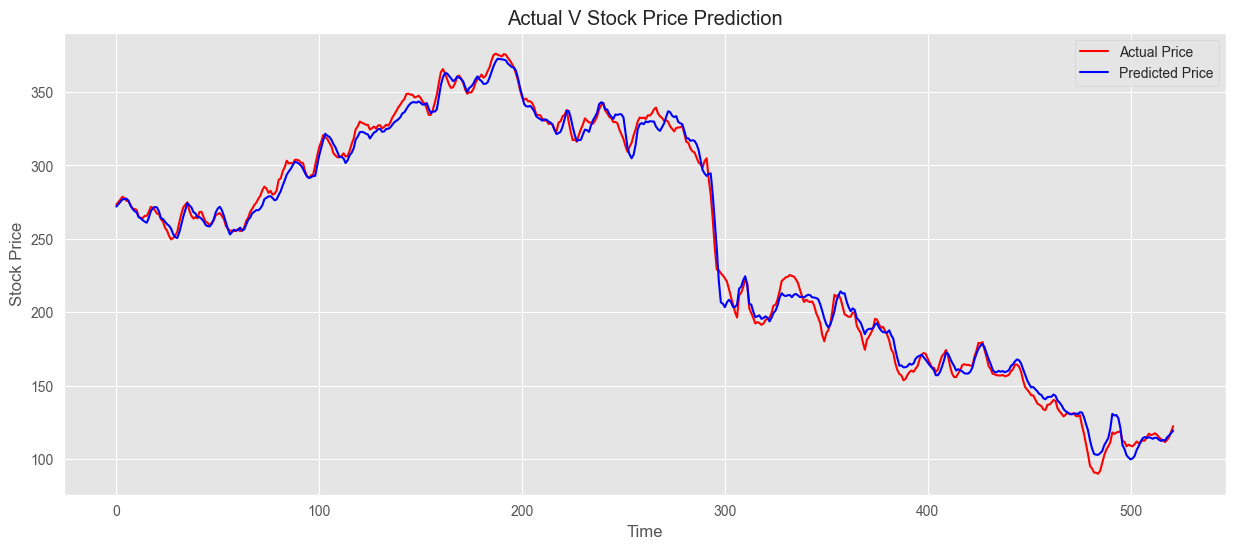

In [54]:
plot_predictions(test_label, predicted, "Actual V Stock Price Prediction")

In [ ]:
# Performance Metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error


# Calculate performance metrics
mse = mean_squared_error(test_label, predicted)
rmse = np.sqrt(mse)
mae = mean_absolute_error(test_label, predicted)
mape = np.mean(np.abs((test_label - predicted) / test_label)) * 100

# Print performance metrics
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")

Mean Squared Error (MSE): 92.41113721041768
Root Mean Squared Error (RMSE): 9.613071164327126
Mean Absolute Error (MAE): 6.983144098081758
Mean Absolute Percentage Error (MAPE): 3.29%


In [21]:
# save the model
model.save('improved_cnn_lstm_model.keras')